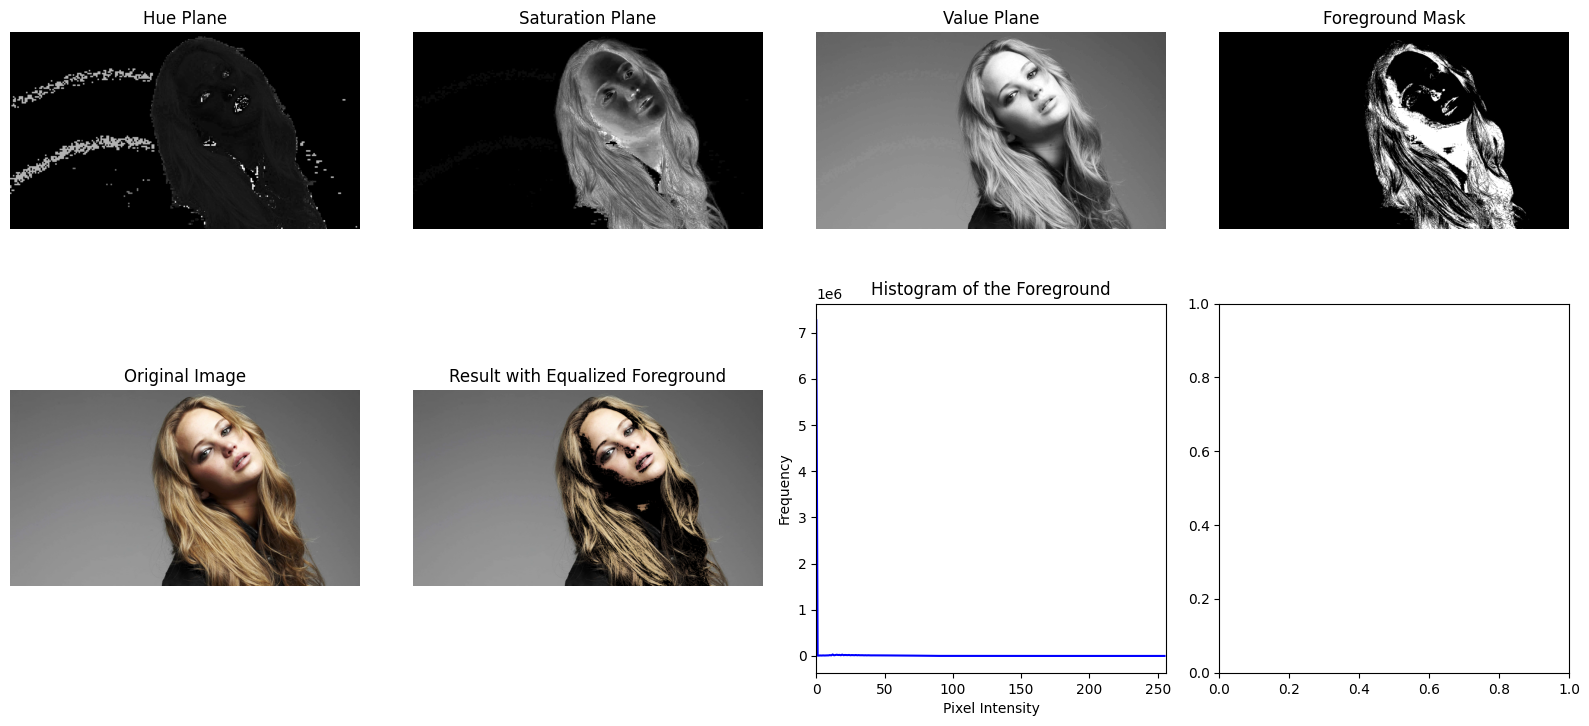

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/kavindujayathissa/Desktop/Academics/Semester 05/EN3160 Image Processing/Assignment A01/a1images/jeniffer.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Hue, Saturation, and Value planes
for i, plane_name in enumerate(["Hue", "Saturation", "Value"]):
    axes[0, i].imshow(hsv[:, :, i], cmap='gray')
    axes[0, i].set_title(f'{plane_name} Plane')
    axes[0, i].axis('off')

threshold_plane = hsv[:, :, 1]
_, mask = cv2.threshold(threshold_plane, 120, 255, cv2.THRESH_BINARY)

# Foreground mask
axes[0, 3].imshow(mask, cmap='gray')
axes[0, 3].set_title('Foreground Mask')
axes[0, 3].axis('off')

foreground = cv2.bitwise_and(image, image, mask=mask)
hist = cv2.calcHist([foreground], [0], None, [256], [0, 256])
cumulative = np.cumsum(hist)
cumulative_normalized = cumulative / cumulative[-1]

# Apply histogram equalization to the foreground
equalized_foreground = np.interp(foreground[:, :, 0], np.arange(256), cumulative_normalized).astype(np.uint8)

background_mask = cv2.bitwise_not(mask)
background = cv2.bitwise_and(image, image, mask=background_mask)

result_image = cv2.add(background, cv2.cvtColor(equalized_foreground, cv2.COLOR_GRAY2BGR))

# Original image
axes[1, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original Image')
axes[1, 0].axis('off')

# Result with equalized foreground
axes[1, 1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Result with Equalized Foreground')
axes[1, 1].axis('off')

# Histogram of the foreground
axes[1, 2].plot(hist, color='b')
axes[1, 2].set_xlim([0, 256])
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Histogram of the Foreground')

plt.tight_layout()
plt.show()
